In [1]:
import pandas as pd

In [3]:
#Retrieving data from top5 european league players

url = "https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats"

#url = "https://fbref.com/en/comps/Big5/2023-2024/stats/players/2023-2024-Big-5-European-Leagues-Stats"

df = pd.read_html(url, attrs={"id": "stats_standard"}) 

#Getting the first item from the list
df = df[0]

In [4]:
#Dropping per 90 stats and creating our own later
df = df[df.columns.drop(list(df.filter(regex='Per 90')))]

In [5]:
#Dropping top header that we dont need
df = df.droplevel(0, axis = 1)

In [9]:
#Filtering for position, Forward
df = df[df['Pos'].str.contains('FW')]

In [11]:
#Filtering for players that have played more than 400 minutes
#Casting datatype to integer (number)
df = df[df['Min'].astype(int) > 900]
#df = df[df['Age'].astype(int) <= 27]

In [13]:
df.head(10)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
6,7,Himad Abdelli,dz ALG,"MF,FW",Angers,fr Ligue 1,25-085,1999,21,21,...,2,0,4.2,1.8,2.8,4.6,78,146,87,Matches
13,14,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21-319,2003,21,20,...,1,0,5.7,4.9,2.4,7.4,42,32,113,Matches
15,16,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,24-358,2000,21,20,...,4,0,9.4,7.8,1.5,9.3,28,21,148,Matches
23,24,Akor Adams,ng NGA,FW,Montpellier,fr Ligue 1,25-012,2000,15,13,...,2,0,4.3,4.3,1.0,5.3,11,6,45,Matches
24,25,Che Adams,sct SCO,FW,Torino,it Serie A,28-212,1996,23,18,...,1,0,4.4,4.4,1.7,6.1,14,22,91,Matches
27,27,Junior Adamu,at AUT,FW,Freiburg,de Bundesliga,23-249,2001,16,11,...,3,1,4.0,4.0,1.4,5.4,5,6,51,Matches
38,38,Oladapo Afolayan,eng ENG,"FW,MF",St. Pauli,de Bundesliga,26-364,1998,20,13,...,2,0,2.7,2.7,3.2,5.9,40,22,87,Matches
62,61,Ludovic Ajorque,fr FRA,FW,Brest,fr Ligue 1,30-351,1994,19,17,...,4,0,6.0,5.2,2.3,7.5,6,30,76,Matches
68,67,Maghnes Akliouche,fr FRA,"FW,MF",Monaco,fr Ligue 1,22-351,2002,19,15,...,1,0,4.1,4.1,4.9,9.0,63,101,128,Matches
83,81,Mohamed Ali Cho,fr FRA,"FW,MF",Nice,fr Ligue 1,21-022,2004,17,15,...,2,0,2.3,2.3,2.8,5.1,47,38,93,Matches


In [15]:
#What columns do we have?
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Matches'],
      dtype='object')

In [17]:
#Casting the data based on the metrics

df[['90s', 'npxG', 'xAG']] = df[['90s', 'npxG', 'xAG']].astype(float)

df[['Gls', 'Ast', 'PrgC', 'PrgP', 'PrgR']] = df[['Gls', 'Ast', 'PrgC', 'PrgP', 'PrgR']].astype(int)

In [19]:
#Calculating per 90 metrics

df['goals_per_90'] = df['Gls'] / df['90s']
df['npxG_per_90'] = df['npxG'] / df['90s']
df['assists_per_90'] = df['Ast'] / df['90s']
df['xAG_per_90'] = df['xAG'] / df['90s']
df['progressive_carries_per_90'] = df['PrgC'] / df['90s']
df['progressive_passes_per_90'] = df['PrgP'] / df['90s']
df['progressive_receptions_per_90'] = df['PrgR'] / df['90s']

In [22]:
df_sorted = df.sort_values(by='90s', ascending=False)
df_sorted[['Player', 'Gls', 'Ast', 'PrgC', 'PrgP', 'PrgR', 'xAG', '90s']].head(20)

,Player,Gls,Ast,PrgC,PrgP,PrgR,xAG,90s
1632,Bryan Mbeumo,14,3,84,91,233,5.7,23.9
1061,Emmanuel Gyasi,2,1,14,35,72,0.5,23.7
1063,Erling Haaland,19,2,16,15,95,2.1,23.6
2220,Mohamed Salah,21,13,98,92,298,9.3,22.5
2309,Antoine Semenyo,7,3,95,67,196,4.0,22.4
1180,Alex Iwobi,7,3,101,151,167,4.9,22.4
2039,Roberto Piccoli,6,0,16,27,108,0.6,22.1
1365,Nikola Krstović,7,3,24,40,93,1.7,21.9
1369,Dejan Kulusevski,6,4,110,106,184,5.7,21.7
2613,Carlos Vicente,3,3,66,33,135,3.6,21.5


In [24]:
df_goals = df.sort_values(by='goals_per_90', ascending=False)
df_goals[['Player', 'Squad', 'Min', 'goals_per_90']].head(10)

,Player,Squad,Min,goals_per_90
2121,Mateo Retegui,Atalanta,1316,1.369863
1266,Harry Kane,Bayern Munich,1524,1.242604
671,Ousmane Dembélé,Paris S-G,1204,1.194030
2014,Ayoze Pérez,Villarreal,906,0.990099
1433,Robert Lewandowski,Barcelona,1746,0.979381
402,Jonathan Burkardt,Mainz 05,1147,0.944882
2220,Mohamed Salah,Liverpool,2029,0.933333
1575,Omar Marmoush,Eint Frankfurt,1448,0.931677
1171,Alexander Isak,Newcastle Utd,1799,0.850000
1063,Erling Haaland,Manchester City,2124,0.805085


In [26]:
df_assists = df.sort_values(by='assists_per_90', ascending=False)
df_assists[['Player', 'Squad', 'Min', 'Age', 'assists_per_90']].head(10)

,Player,Squad,Min,Age,assists_per_90
2216,Bukayo Saka,Arsenal,1268,23-158,0.709220
2220,Mohamed Salah,Liverpool,2029,32-240,0.577778
1575,Omar Marmoush,Eint Frankfurt,1448,26-003,0.559006
2699,Lamine Yamal,Barcelona,1612,17-212,0.558659
523,Rayan Cherki,Lyon,1066,21-177,0.508475
798,Anthony Elanga,Nott'ham Forest,1459,22-289,0.493827
1892,Michael Olise,Bayern Munich,1309,23-060,0.482759
1766,Jacob Murphy,Newcastle Utd,1341,29-352,0.469799
2274,Sávio,Manchester City,1170,20-306,0.461538
2731,Bryan Zaragoza,Osasuna,1056,23-291,0.427350


In [154]:
df_carries = df.sort_values(by='progressive_carries_per_90', ascending=False)
df_carries[['Player', 'Squad', 'progressive_carries_per_90']].head(10)

,Player,Squad,progressive_carries_per_90
2248,Sávio,Manchester City,7.230769
1495,Noni Madueke,Chelsea,6.729560
664,Ousmane Dembélé,Paris S-G,6.716418
1223,Vinicius Júnior,Real Madrid,6.688742
1785,Dan Ndoye,Bologna,6.124031
952,Jamie Gittens,Dortmund,5.962733
1795,Pedro Neto,Chelsea,5.952381
232,Bradley Barcola,Paris S-G,5.882353
2650,Nico Williams,Athletic Club,5.859873
822,Abde Ezzalzouli,Betis,5.739645


In [156]:
df_xAG = df.sort_values(by='xAG_per_90', ascending=False)
df_xAG[['Player', 'Squad', 'Min', 'Age', 'xAG_per_90']].head(10)

,Player,Squad,Min,Age,xAG_per_90
517,Rayan Cherki,Lyon,976,21-176,0.490741
2072,Raphinha,Barcelona,1801,28-057,0.490000
2672,Lamine Yamal,Barcelona,1524,17-211,0.467456
664,Ousmane Dembélé,Paris S-G,1204,27-270,0.455224
232,Bradley Barcola,Paris S-G,1378,22-160,0.444444
1747,Jacob Murphy,Newcastle Utd,1341,29-351,0.422819
2194,Mohamed Salah,Liverpool,2029,32-239,0.413333
2190,Bukayo Saka,Arsenal,1268,23-157,0.411348
2248,Sávio,Manchester City,1170,20-305,0.407692
2393,Kevin Stöger,Gladbach,1092,31-166,0.396694


In [158]:
df_receptions = df.sort_values(by='progressive_receptions_per_90', ascending=False)
df_receptions[['Player', 'Squad', 'Age', 'Min', 'progressive_receptions_per_90']].head(10)

,Player,Squad,Age,Min,progressive_receptions_per_90
558,Kingsley Coman,Bayern Munich,28-241,937,16.153846
232,Bradley Barcola,Paris S-G,22-160,1378,14.901961
2190,Bukayo Saka,Arsenal,23-157,1268,13.829787
1869,Michael Olise,Bayern Munich,23-059,1309,13.724138
900,Cody Gakpo,Liverpool,25-278,1302,13.724138
2194,Mohamed Salah,Liverpool,32-239,2029,13.244444
664,Ousmane Dembélé,Paris S-G,27-270,1204,13.059701
2672,Lamine Yamal,Barcelona,17-211,1524,12.899408
1612,Kylian Mbappé,Real Madrid,26-051,1818,12.722772
919,Alejandro Garnacho,Manchester Utd,20-223,1321,12.448980


In [30]:
df_npxG = df.sort_values(by='npxG_per_90', ascending=False)
df_npxG[['Player', 'Age', 'Squad', 'Min', 'npxG_per_90']].head(10)

,Player,Age,Squad,Min,npxG_per_90
1433,Robert Lewandowski,36-173,Barcelona,1746,0.871134
792,Hugo Ekitike,22-235,Eint Frankfurt,1507,0.772455
808,Emanuel Emegha,22-007,Strasbourg,1311,0.767123
2559,Deniz Undav,28-206,Stuttgart,949,0.761905
807,Breel Embolo,27-362,Monaco,1050,0.717949
671,Ousmane Dembélé,27-271,Paris S-G,1204,0.708955
1063,Erling Haaland,24-204,Manchester City,2124,0.703390
1171,Alexander Isak,25-142,Newcastle Utd,1799,0.670000
234,Bradley Barcola,22-161,Paris S-G,1378,0.640523
402,Jonathan Burkardt,24-214,Mainz 05,1147,0.637795


In [42]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Matches', 'goals_per_90', 'npxG_per_90', 'assists_per_90',
       'xAG_per_90', 'progressive_carries_per_90', 'progressive_passes_per_90',
       'progressive_receptions_per_90'],
      dtype='object')

In [44]:
standard_stats = df[['Player', 'Age', 'Squad', 'Min', 'goals_per_90', 'npxG_per_90', 'assists_per_90',
       'xAG_per_90', 'progressive_carries_per_90', 'progressive_passes_per_90',
       'progressive_receptions_per_90']]

standard_stats.head()

,Player,Age,Squad,Min,goals_per_90,npxG_per_90,assists_per_90,xAG_per_90,progressive_carries_per_90,progressive_passes_per_90,progressive_receptions_per_90
6,Himad Abdelli,25-078,Angers,1772,0.203046,0.091371,0.050761,0.142132,3.908629,7.360406,4.416244
13,Matthis Abline,21-312,Nantes,1585,0.340909,0.267045,0.056818,0.113636,2.329545,1.818182,5.852273
15,Zakaria Aboukhlal,24-351,Toulouse,1600,0.337079,0.438202,0.112360,0.084270,1.573034,1.179775,7.977528
23,Akor Adams,25-005,Montpellier,1075,0.252101,0.361345,0.084034,0.084034,0.924370,0.504202,3.781513
24,Che Adams,28-205,Torino,1486,0.424242,0.260606,0.121212,0.096970,0.787879,1.212121,4.848485


In [46]:
#Retrieving data from top5 european league players

url1 = "https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats"

df1 = pd.read_html(url1, attrs={"id": "stats_passing"}) 

#Getting the first item from the list
df1 = df1[0]

In [47]:
#Dropping per 90 stats and creating our own later
df1 = df1[df1.columns.drop(list(df1.filter(regex='Per 90')))]

In [48]:
#Dropping top header that we dont need
df1 = df1.droplevel(0, axis = 1)

In [52]:
#Filtering for position, Forward
df1 = df1[df1['Pos'].str.contains('FW')]

In [54]:
#Casting the data based on the metrics

df1[['90s', 'xA', 'xAG']] = df1[['90s', 'xA', 'xAG']].astype(float)

df1[['Ast', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP']] = df1[['Ast', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP']].astype(int)

/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_12890/59739535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['90s', 'xA', 'xAG']] = df1[['90s', 'xA', 'xAG']].astype(float)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_12890/59739535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['90s', 'xA', 'xAG']] = df1[['90s', 'xA', 'xAG']].astype(float)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_12890/59739535.py:3: SettingWithCopyWarning: 
A value is trying t

In [56]:
df1.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,...,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP,Matches
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18-304,2006,0.0,2,...,0,0.0,0.0,0.0,0,0,0,0,0,Matches
6,7,Himad Abdelli,dz ALG,"MF,FW",Angers,fr Ligue 1,25-078,1999,19.7,933,...,1,2.8,2.6,-1.8,29,110,27,1,145,Matches
13,14,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21-312,2003,17.6,220,...,1,2.0,2.3,-1.0,15,13,11,1,32,Matches
15,16,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,24-351,2000,17.8,191,...,2,1.5,1.8,+0.5,10,13,9,3,21,Matches
17,18,Tammy Abraham,eng ENG,FW,Roma,it Serie A,27-124,1997,0.0,1,...,0,0.0,0.0,0.0,0,1,0,0,1,Matches


In [58]:
average_90s = df1['90s'].mean()
print("Average of '90s' column:", average_90s)

Average of '90s' column: 7.787128712871287


In [60]:
#Filtering for players that have played more than 400 minutes
#Casting datatype to integer (number)
df1 = df1[df1['90s'] > 10]

In [62]:
df1.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,...,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP,Matches
6,7,Himad Abdelli,dz ALG,"MF,FW",Angers,fr Ligue 1,25-078,1999,19.7,933,...,1,2.8,2.6,-1.8,29,110,27,1,145,Matches
13,14,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21-312,2003,17.6,220,...,1,2.0,2.3,-1.0,15,13,11,1,32,Matches
15,16,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,24-351,2000,17.8,191,...,2,1.5,1.8,+0.5,10,13,9,3,21,Matches
23,24,Akor Adams,ng NGA,FW,Montpellier,fr Ligue 1,25-005,2000,11.9,112,...,1,1.0,0.1,0.0,12,8,0,0,6,Matches
24,25,Che Adams,sct SCO,FW,Torino,it Serie A,28-205,1996,16.5,245,...,2,1.6,2.2,+0.4,19,20,4,0,20,Matches


In [64]:
#Calculating per 90 metrics

df1['assists_per_90'] = df1['Ast'] / df1['90s']
df1['expected_assists_per_90'] = df1['xA'] / df1['90s']
df1['key_passes_per_90'] = df1['KP'] / df1['90s']
df1['final_third_passes_per_90'] = df1['1/3'] / df1['90s']
df1['passes_into_penalty_area_per_90'] = df1['PPA'] / df1['90s']
df1['crosses_into_penalty_area_90'] = df1['CrsPA'] / df1['90s']
df1['progressive_passes_per_90'] = df1['PrgP'] / df1['90s']

/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_12890/430780969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['assists_per_90'] = df1['Ast'] / df1['90s']
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_12890/430780969.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['expected_assists_per_90'] = df1['xA'] / df1['90s']
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_12890/430780969.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [66]:
df1.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp', 'Att', 'Cmp%', 'Cmp',
       'Att', 'Cmp%', 'Cmp', 'Att', 'Cmp%', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP',
       '1/3', 'PPA', 'CrsPA', 'PrgP', 'Matches', 'assists_per_90',
       'expected_assists_per_90', 'key_passes_per_90',
       'final_third_passes_per_90', 'passes_into_penalty_area_per_90',
       'crosses_into_penalty_area_90', 'progressive_passes_per_90'],
      dtype='object')

In [68]:
df1_sorted = df1.sort_values(by='crosses_into_penalty_area_90', ascending=False)
df1_sorted[['Player', 'Pos', 'assists_per_90', 'expected_assists_per_90', 'key_passes_per_90',
       'final_third_passes_per_90', 'passes_into_penalty_area_per_90',
       'crosses_into_penalty_area_90', 'progressive_passes_per_90']].head(10)

,Player,Pos,assists_per_90,expected_assists_per_90,key_passes_per_90,final_third_passes_per_90,passes_into_penalty_area_per_90,crosses_into_penalty_area_90,progressive_passes_per_90
1142,Junya Ito,FW,0.153846,0.374359,3.076923,2.512821,2.615385,1.076923,4.820513
2427,Florian Thauvin,"FW,MF",0.177515,0.207101,1.715976,2.662722,2.011834,1.065089,4.142012
1859,Christopher Operi,"DF,FW",0.153846,0.246154,1.846154,2.769231,1.538462,1.000000,4.000000
892,Álvaro García,"FW,MF",0.145985,0.204380,1.897810,0.729927,2.116788,0.948905,3.138686
2281,Moses Simon,"FW,MF",0.355030,0.177515,1.952663,0.828402,1.538462,0.946746,2.130178
2658,Alessandro Zanoli,"FW,DF",0.000000,0.070866,1.181102,0.629921,1.417323,0.944882,1.496063
2662,Bryan Zaragoza,"FW,MF",0.427350,0.282051,1.709402,0.854701,1.538462,0.940171,2.222222
683,Federico Dimarco,"DF,FW",0.242424,0.200000,2.060606,1.878788,1.696970,0.909091,3.454545
167,Tommaso Augello,"DF,FW",0.193548,0.193548,1.483871,2.967742,1.354839,0.903226,3.870968
2076,Luis Rioja,"MF,FW",0.051813,0.150259,1.139896,1.554404,1.450777,0.880829,2.383420


In [70]:
df1_KP = df1.sort_values(by='key_passes_per_90', ascending=False)
df1_KP[['Player', 'Squad', 'key_passes_per_90']].head(10)

,Player,Squad,key_passes_per_90
2356,Kevin Stöger,Gladbach,4.324324
503,Rayan Cherki,Lyon,3.703704
648,Ousmane Dembélé,Paris S-G,3.467742
192,Alex Baena,Villarreal,3.461538
2040,Raphinha,Barcelona,3.450000
1230,Lee Kang-in,Paris S-G,3.383459
1839,Michael Olise,Bayern Munich,3.185185
1142,Junya Ito,Reims,3.076923
2158,Bukayo Saka,Arsenal,2.978723
2099,Rodrygo,Real Madrid,2.727273


In [72]:
df1_crosses = df1.sort_values(by='crosses_into_penalty_area_90', ascending=False)
df1_crosses[['Player', 'Squad', 'crosses_into_penalty_area_90']].head(10)

,Player,Squad,crosses_into_penalty_area_90
1142,Junya Ito,Reims,1.076923
2427,Florian Thauvin,Udinese,1.065089
1859,Christopher Operi,Le Havre,1.000000
892,Álvaro García,Rayo Vallecano,0.948905
2281,Moses Simon,Nantes,0.946746
2658,Alessandro Zanoli,Genoa,0.944882
2662,Bryan Zaragoza,Osasuna,0.940171
683,Federico Dimarco,Inter,0.909091
167,Tommaso Augello,Cagliari,0.903226
2076,Luis Rioja,Valencia,0.880829


In [74]:
df1_prog_passes = df1.sort_values(by='progressive_passes_per_90', ascending=False)
df1_prog_passes[['Player', 'Squad', 'progressive_passes_per_90']].head(10)

,Player,Squad,progressive_passes_per_90
503,Rayan Cherki,Lyon,9.907407
941,Aleksandr Golovin,Monaco,9.024390
1414,Giovani Lo Celso,Betis,8.703704
1230,Lee Kang-in,Paris S-G,7.819549
1839,Michael Olise,Bayern Munich,7.629630
606,Mikkel Damsgaard,Brentford,7.386935
6,Himad Abdelli,Angers,7.360406
1322,Rasmus Kristensen,Eint Frankfurt,7.358491
851,Pablo Fornals,Betis,7.327586
2356,Kevin Stöger,Gladbach,7.207207


In [76]:
df1_pen_passes = df1.sort_values(by='passes_into_penalty_area_per_90', ascending=False)
df1_pen_passes[['Player', 'Squad', 'passes_into_penalty_area_per_90']].head(10)

,Player,Squad,passes_into_penalty_area_per_90
1839,Michael Olise,Bayern Munich,4.592593
503,Rayan Cherki,Lyon,3.888889
2215,Sávio,Manchester City,3.076923
2154,Osame Sahraoui,Lille,2.818182
2162,Mohamed Salah,Liverpool,2.800000
648,Ousmane Dembélé,Paris S-G,2.741935
1230,Lee Kang-in,Paris S-G,2.706767
2631,Lamine Yamal,Barcelona,2.662722
1142,Junya Ito,Reims,2.615385
1145,Alex Iwobi,Fulham,2.589286


In [78]:
df1_final_third_passes = df1.sort_values(by='final_third_passes_per_90', ascending=False)
df1_final_third_passes[['Player', 'Squad', 'final_third_passes_per_90']].head(10)

,Player,Squad,final_third_passes_per_90
941,Aleksandr Golovin,Monaco,6.178862
1414,Giovani Lo Celso,Betis,5.833333
2356,Kevin Stöger,Gladbach,5.765766
1322,Rasmus Kristensen,Eint Frankfurt,5.660377
1230,Lee Kang-in,Paris S-G,5.639098
6,Himad Abdelli,Angers,5.583756
1640,Enzo Millot,Stuttgart,4.855072
648,Ousmane Dembélé,Paris S-G,4.838710
1004,Pape Gueye,Villarreal,4.774194
606,Mikkel Damsgaard,Brentford,4.773869


In [80]:
df1_assists = df1.sort_values(by='assists_per_90', ascending=False)
df1_assists[['Player', 'Squad', 'assists_per_90']].head(10)

,Player,Squad,assists_per_90
2158,Bukayo Saka,Arsenal,0.709220
2631,Lamine Yamal,Barcelona,0.591716
2162,Mohamed Salah,Liverpool,0.577778
1531,Omar Marmoush,Eint Frankfurt,0.559006
1839,Michael Olise,Bayern Munich,0.518519
772,Anthony Elanga,Nott'ham Forest,0.493827
1721,Jacob Murphy,Newcastle Utd,0.469799
2215,Sávio,Manchester City,0.461538
983,Vincenzo Grifo,Freiburg,0.454545
1229,Harry Kane,Bayern Munich,0.440252


In [82]:
df1_expected_assists = df1.sort_values(by='expected_assists_per_90', ascending=False)
df1_expected_assists[['Player', 'Squad', 'expected_assists_per_90']].head(10)

,Player,Squad,expected_assists_per_90
503,Rayan Cherki,Lyon,0.592593
1839,Michael Olise,Bayern Munich,0.525926
192,Alex Baena,Villarreal,0.456044
648,Ousmane Dembélé,Paris S-G,0.411290
2158,Bukayo Saka,Arsenal,0.397163
2215,Sávio,Manchester City,0.392308
1230,Lee Kang-in,Paris S-G,0.383459
1142,Junya Ito,Reims,0.374359
2040,Raphinha,Barcelona,0.350000
738,Marvin Ducksch,Werder Bremen,0.342541


In [84]:
df1.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp', 'Att', 'Cmp%', 'Cmp',
       'Att', 'Cmp%', 'Cmp', 'Att', 'Cmp%', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP',
       '1/3', 'PPA', 'CrsPA', 'PrgP', 'Matches', 'assists_per_90',
       'expected_assists_per_90', 'key_passes_per_90',
       'final_third_passes_per_90', 'passes_into_penalty_area_per_90',
       'crosses_into_penalty_area_90', 'progressive_passes_per_90'],
      dtype='object')

In [86]:
stats_passing = df1[['Player','expected_assists_per_90', 'key_passes_per_90',
       'final_third_passes_per_90', 'passes_into_penalty_area_per_90',
       'crosses_into_penalty_area_90']]

stats_passing.head()

,Player,expected_assists_per_90,key_passes_per_90,final_third_passes_per_90,passes_into_penalty_area_per_90,crosses_into_penalty_area_90
6,Himad Abdelli,0.131980,1.472081,5.583756,1.370558,0.050761
13,Matthis Abline,0.130682,0.852273,0.738636,0.625000,0.056818
15,Zakaria Aboukhlal,0.101124,0.561798,0.730337,0.505618,0.168539
23,Akor Adams,0.008403,1.008403,0.672269,0.000000,0.000000
24,Che Adams,0.133333,1.151515,1.212121,0.242424,0.000000


In [91]:
#Merging the two tables standard_stats and stats_passing

In [93]:
merged_df = standard_stats.merge(stats_passing, on='Player', how='inner')

merged_df.head()

,Player,Age,Squad,Min,goals_per_90,npxG_per_90,assists_per_90,xAG_per_90,progressive_carries_per_90,progressive_passes_per_90,progressive_receptions_per_90,expected_assists_per_90,key_passes_per_90,final_third_passes_per_90,passes_into_penalty_area_per_90,crosses_into_penalty_area_90
0,Himad Abdelli,25-078,Angers,1772,0.203046,0.091371,0.050761,0.142132,3.908629,7.360406,4.416244,0.131980,1.472081,5.583756,1.370558,0.050761
1,Matthis Abline,21-312,Nantes,1585,0.340909,0.267045,0.056818,0.113636,2.329545,1.818182,5.852273,0.130682,0.852273,0.738636,0.625000,0.056818
2,Zakaria Aboukhlal,24-351,Toulouse,1600,0.337079,0.438202,0.112360,0.084270,1.573034,1.179775,7.977528,0.101124,0.561798,0.730337,0.505618,0.168539
3,Akor Adams,25-005,Montpellier,1075,0.252101,0.361345,0.084034,0.084034,0.924370,0.504202,3.781513,0.008403,1.008403,0.672269,0.000000,0.000000
4,Che Adams,28-205,Torino,1486,0.424242,0.260606,0.121212,0.096970,0.787879,1.212121,4.848485,0.133333,1.151515,1.212121,0.242424,0.000000


In [95]:
m_carries = merged_df.sort_values(by='progressive_carries_per_90', ascending=False)
m_carries[['Player', 'Age', 'Squad', 'Min', 'progressive_carries_per_90']].head(10)

,Player,Age,Squad,Min,progressive_carries_per_90
262,Sávio,20-299,Manchester City,1170,7.230769
64,Ousmane Dembélé,27-264,Paris S-G,1114,7.016129
147,Vinicius Júnior,24-206,Real Madrid,1265,6.666667
180,Noni Madueke,22-330,Chelsea,1373,6.666667
26,Bradley Barcola,22-154,Paris S-G,1316,6.164384
212,Dan Ndoye,24-101,Bologna,1159,6.124031
105,Jamie Gittens,20-179,Dortmund,1363,6.026490
300,Nico Williams,22-206,Athletic Club,1417,5.859873
214,Pedro Neto,24-331,Chelsea,1091,5.785124
95,Malick Fofana,19-309,Lyon,1004,5.714286


In [97]:
m_xAG = merged_df.sort_values(by='xAG_per_90', ascending=False)
m_xAG[['Player', 'Age', 'Squad', 'xAG_per_90']].head(10)

,Player,Age,Squad,xAG_per_90
50,Rayan Cherki,21-170,Lyon,0.490741
244,Raphinha,28-051,Barcelona,0.490000
64,Ousmane Dembélé,27-264,Paris S-G,0.483871
305,Lamine Yamal,17-205,Barcelona,0.461538
206,Jacob Murphy,29-345,Newcastle Utd,0.422819
26,Bradley Barcola,22-154,Paris S-G,0.417808
275,Kevin Stöger,31-160,Gladbach,0.414414
258,Mohamed Salah,32-233,Liverpool,0.413333
257,Bukayo Saka,23-151,Arsenal,0.411348
262,Sávio,20-299,Manchester City,0.407692


In [99]:
m_goals = merged_df.sort_values(by='goals_per_90', ascending=False)
m_goals[['Player', 'Age', 'Squad', 'goals_per_90']].head(10)

,Player,Age,Squad,goals_per_90
149,Harry Kane,31-190,Bayern Munich,1.194969
246,Mateo Retegui,25-280,Atalanta,1.176471
64,Ousmane Dembélé,27-264,Paris S-G,1.129032
170,Robert Lewandowski,36-166,Barcelona,0.967742
41,Jonathan Burkardt,24-207,Mainz 05,0.960000
258,Mohamed Salah,32-233,Liverpool,0.933333
183,Omar Marmoush,25-362,Eint Frankfurt,0.931677
136,Alexander Isak,25-135,Newcastle Utd,0.850000
121,Erling Haaland,24-197,Manchester City,0.805085
304,Chris Wood,33-058,Nott'ham Forest,0.798122


In [101]:
m_KP = merged_df.sort_values(by='key_passes_per_90', ascending=False)
m_KP[['Player', 'Age', 'Squad', 'key_passes_per_90']].head(10)

,Player,Age,Squad,key_passes_per_90
275,Kevin Stöger,31-160,Gladbach,4.324324
50,Rayan Cherki,21-170,Lyon,3.703704
64,Ousmane Dembélé,27-264,Paris S-G,3.467742
22,Alex Baena,23-198,Villarreal,3.461538
244,Raphinha,28-051,Barcelona,3.450000
150,Lee Kang-in,23-350,Paris S-G,3.383459
218,Michael Olise,23-053,Bayern Munich,3.185185
138,Junya Ito,31-331,Reims,3.076923
257,Bukayo Saka,23-151,Arsenal,2.978723
249,Rodrygo,24-025,Real Madrid,2.727273


In [103]:
m_ProgR = merged_df.sort_values(by='progressive_receptions_per_90', ascending=False)
m_ProgR[['Player', 'Age', 'Squad', 'progressive_receptions_per_90']].head(10)

,Player,Age,Squad,progressive_receptions_per_90
26,Bradley Barcola,22-154,Paris S-G,14.726027
257,Bukayo Saka,23-151,Arsenal,13.829787
99,Cody Gakpo,25-272,Liverpool,13.724138
258,Mohamed Salah,32-233,Liverpool,13.244444
64,Ousmane Dembélé,27-264,Paris S-G,13.064516
305,Lamine Yamal,17-205,Barcelona,12.899408
218,Michael Olise,23-053,Bayern Munich,12.592593
188,Kylian Mbappé,26-045,Real Madrid,12.552083
102,Alejandro Garnacho,20-217,Manchester Utd,12.448980
249,Rodrygo,24-025,Real Madrid,12.027972


In [105]:
m_PPA = merged_df.sort_values(by='passes_into_penalty_area_per_90', ascending=False)
m_PPA[['Player', 'Age', 'Squad', 'passes_into_penalty_area_per_90']].head(10)

,Player,Age,Squad,passes_into_penalty_area_per_90
218,Michael Olise,23-053,Bayern Munich,4.592593
50,Rayan Cherki,21-170,Lyon,3.888889
262,Sávio,20-299,Manchester City,3.076923
256,Osame Sahraoui,23-237,Lille,2.818182
258,Mohamed Salah,32-233,Liverpool,2.800000
64,Ousmane Dembélé,27-264,Paris S-G,2.741935
150,Lee Kang-in,23-350,Paris S-G,2.706767
305,Lamine Yamal,17-205,Barcelona,2.662722
138,Junya Ito,31-331,Reims,2.615385
139,Alex Iwobi,28-276,Fulham,2.589286


In [107]:
m_CPA = merged_df.sort_values(by='crosses_into_penalty_area_90', ascending=False)
m_CPA[['Player', 'Age', 'Squad', 'crosses_into_penalty_area_90']].head(10)

,Player,Age,Squad,crosses_into_penalty_area_90
138,Junya Ito,31-331,Reims,1.076923
284,Florian Thauvin,32-008,Udinese,1.065089
220,Christopher Operi,27-280,Le Havre,1.000000
100,Álvaro García,32-099,Rayo Vallecano,0.948905
268,Moses Simon,29-206,Nantes,0.946746
309,Alessandro Zanoli,24-123,Genoa,0.944882
310,Bryan Zaragoza,23-284,Osasuna,0.940171
72,Federico Dimarco,27-085,Inter,0.909091
20,Tommaso Augello,30-157,Cagliari,0.903226
247,Luis Rioja,31-110,Valencia,0.880829


In [109]:
merged_df.columns

Index(['Player', 'Age', 'Squad', 'Min', 'goals_per_90', 'npxG_per_90',
       'assists_per_90', 'xAG_per_90', 'progressive_carries_per_90',
       'progressive_passes_per_90', 'progressive_receptions_per_90',
       'expected_assists_per_90', 'key_passes_per_90',
       'final_third_passes_per_90', 'passes_into_penalty_area_per_90',
       'crosses_into_penalty_area_90'],
      dtype='object')

In [111]:
m_F3 = merged_df.sort_values(by='final_third_passes_per_90', ascending=False)
m_F3[['Player', 'Age', 'Squad', 'final_third_passes_per_90']].head(10)

,Player,Age,Squad,final_third_passes_per_90
106,Aleksandr Golovin,28-249,Monaco,6.178862
172,Giovani Lo Celso,28-300,Betis,5.833333
275,Kevin Stöger,31-160,Gladbach,5.765766
160,Rasmus Kristensen,27-207,Eint Frankfurt,5.660377
150,Lee Kang-in,23-350,Paris S-G,5.639098
0,Himad Abdelli,25-078,Angers,5.583756
195,Enzo Millot,22-201,Stuttgart,4.855072
64,Ousmane Dembélé,27-264,Paris S-G,4.838710
115,Pape Gueye,26-010,Villarreal,4.774194
57,Mikkel Damsgaard,24-215,Brentford,4.773869


In [113]:
m_nxG = merged_df.sort_values(by='npxG_per_90', ascending=False)
m_nxG[['Player', 'Age', 'Squad', 'npxG_per_90']].head(10)

,Player,Age,Squad,npxG_per_90
170,Robert Lewandowski,36-166,Barcelona,0.870968
86,Breel Embolo,27-355,Monaco,0.775701
87,Emanuel Emegha,22-000,Strasbourg,0.735294
83,Hugo Ekitike,22-228,Eint Frankfurt,0.713376
121,Erling Haaland,24-197,Manchester City,0.703390
26,Bradley Barcola,22-154,Paris S-G,0.671233
136,Alexander Isak,25-135,Newcastle Utd,0.670000
64,Ousmane Dembélé,27-264,Paris S-G,0.653226
41,Jonathan Burkardt,24-207,Mainz 05,0.632000
244,Raphinha,28-051,Barcelona,0.625000


In [32]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Matches', 'goals_per_90', 'npxG_per_90', 'assists_per_90',
       'xAG_per_90', 'progressive_carries_per_90', 'progressive_passes_per_90',
       'progressive_receptions_per_90'],
      dtype='object')

In [53]:
#Preparing Radars

In [123]:
from mplsoccer import Radar
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.font_manager as font_manager

font_path = 'Arvo-Regular.ttf'
font_props = font_manager.FontProperties(fname=font_path)

#Percentiles calculation 

merged_df['Goals'] = (merged_df['goals_per_90'].rank(pct=True) * 100).astype(int)
merged_df['NPxG'] = (merged_df['npxG_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Assists'] = (merged_df['assists_per_90'].rank(pct=True) * 100).astype(int)
merged_df['xAG'] = (merged_df['xAG_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Prog Carries'] = (merged_df['progressive_carries_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Prog Passes'] = (merged_df['progressive_passes_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Prog Receptions'] = (merged_df['progressive_receptions_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Key Passes'] = (merged_df['key_passes_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Final 1/3 Passes'] = (merged_df['final_third_passes_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Passes into PA'] = (merged_df['passes_into_penalty_area_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Crosses into PA'] = (merged_df['crosses_into_penalty_area_90'].rank(pct=True) * 100).astype(int)

#Filtering and sorting which columns to use in radar
columns_to_plot = [
    'Goals', 'Assists', 'NPxG', 'xAG',
    'Prog Carries', 'Prog Passes', 'Prog Receptions',
    'Key Passes', 'Final 1/3 Passes', 'Passes into PA', 'Crosses into PA'
]

#Creating min and max value for radar
radar = Radar(
    params=columns_to_plot,
    min_range=[0 for _ in columns_to_plot],
    max_range=[100 for _ in columns_to_plot]
)

slice_colors = ["#D72638"] * 4 + ["#E63946"] * 3 + ["#FF6B6B"] * 4
#text_colors = ["white"]*9

#Players to plot

salah = merged_df[merged_df['Player'] == 'Mohamed Salah']
dorgu = merged_df[merged_df['Player'] == 'Patrick Dorgu']
dimarco = merged_df[merged_df['Player'] == 'Federico Dimarco']
grimaldo = merged_df[merged_df['Player'] == 'Álex Grimaldo']
davies = merged_df[merged_df['Player'] == 'Alphonso Davies']
gutierrez = merged_df[merged_df['Player'] == 'Miguel Gutiérrez']
robinson = merged_df[merged_df['Player'] == 'Antonee Robinson']
aitnouri = merged_df[merged_df['Player'] == 'Rayan Aït-Nouri']
raum = merged_df[merged_df['Player'] == 'David Raum']
kerkez = merged_df[merged_df['Player'] == 'Milos Kerkez']

In [136]:
#Creating Radar Chart

<Axes: >

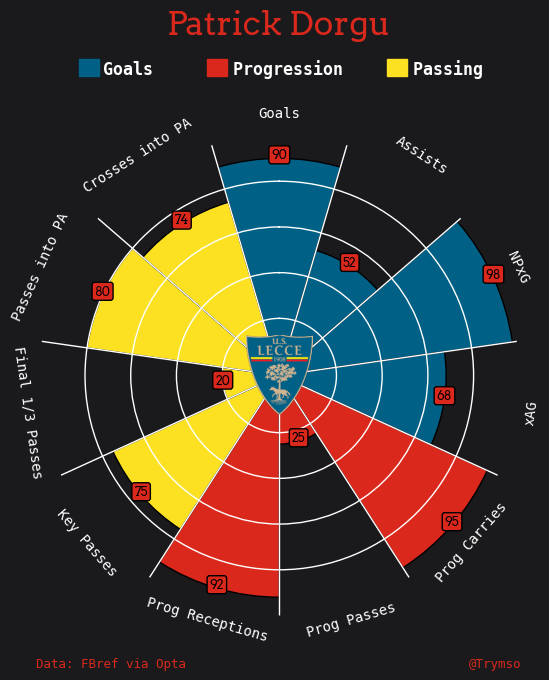

In [144]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(dorgu[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': '#DA291C',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure



# Add the title
ax.text(x=.5, y=1.23, s='Patrick Dorgu', fontsize=24, weight='bold', c='#DA291C', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)


ax.text(
    x=.15, y=-0.1,  # Position below the plot (adjust y as needed)
    s='Data: FBref via Opta',  # Example subtext
    fontsize=9,  # Smaller font size for subtext
    color='#DA291C',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)


ax.text(
    x=.95, y=-0.1,  # Position below the plot (adjust y as needed)
    s='@Trymso',  # Example subtext
    fontsize=9,  # Smaller font size for subtext
    color='#DA291C',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)




import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import Radar, add_image


# add text
fig.text(
    0.28, 0.877, "Goals        Progression       Passing", size=12,
    fontproperties='monospace', weight='bold', color="white"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.25, 0.875), 0.025, 0.021, fill=True, color="#006086",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.41, 0.875), 0.025, 0.021, fill=True, color="#DA291C",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.635, 0.875), 0.025, 0.021, fill=True, color="#FBE122",
        transform=fig.transFigure, figure=fig
    ),
])


# Load your team logo
chelsea_logo_path = "/Users/trymso/Desktop/lecce_logo.webp"
chelsea_logo = Image.open(chelsea_logo_path)

add_image(chelsea_logo, fig, left=0.45, bottom=0.45, width=0.1, height=0.1)



FileNotFoundError: [Errno 2] No such file or directory: '/Users/trymso/Desktop/lecce_logo.webp'

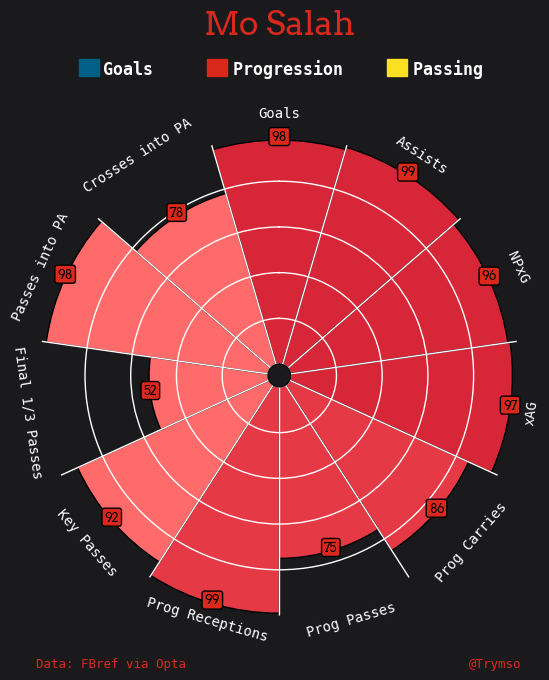

In [125]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(salah[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': '#DA291C',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure



# Add the title
ax.text(x=.5, y=1.23, s='Mo Salah', fontsize=24, weight='bold', c='#DA291C', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)


ax.text(
    x=.15, y=-0.1,  # Position below the plot (adjust y as needed)
    s='Data: FBref via Opta',  # Example subtext
    fontsize=9,  # Smaller font size for subtext
    color='#DA291C',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)


ax.text(
    x=.95, y=-0.1,  # Position below the plot (adjust y as needed)
    s='@Trymso',  # Example subtext
    fontsize=9,  # Smaller font size for subtext
    color='#DA291C',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)




import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import Radar, add_image


# add text
fig.text(
    0.28, 0.877, "Goals        Progression       Passing", size=12,
    fontproperties='monospace', weight='bold', color="white"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.25, 0.875), 0.025, 0.021, fill=True, color="#006086",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.41, 0.875), 0.025, 0.021, fill=True, color="#DA291C",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.635, 0.875), 0.025, 0.021, fill=True, color="#FBE122",
        transform=fig.transFigure, figure=fig
    ),
])


# Load your team logo
chelsea_logo_path = "/Users/trymso/Desktop/lecce_logo.webp"
chelsea_logo = Image.open(chelsea_logo_path)

add_image(chelsea_logo, fig, left=0.45, bottom=0.45, width=0.1, height=0.1)



In [146]:
fig.savefig('/Users/Trymso/Desktop/Dorgu_radar.png', dpi=300, bbox_inches='tight') #remove (#) if you wanna save to desktop

Text(0.5, -0.1, 'Data: FBref, Compared with Defenders in Top5 Leagues 23/24')

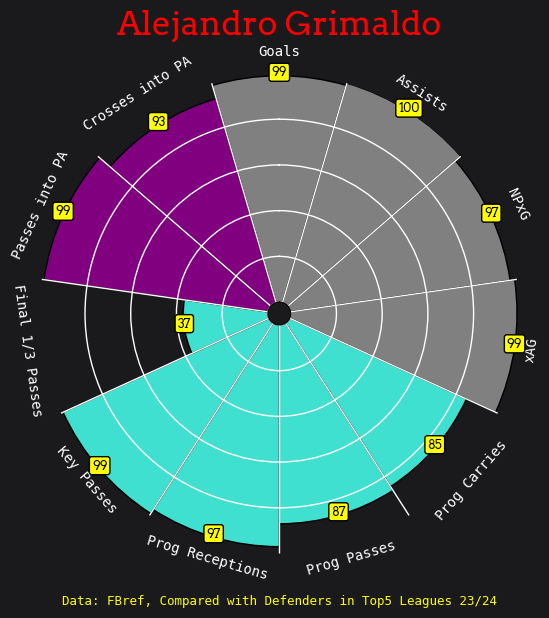

In [58]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(grimaldo[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': 'yellow',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

# Add the title
ax.text(x=.5, y=1.23, s='Alphonso Davies', fontsize=24, weight='bold', c='red', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)

ax.text(
    x=.15, y=-0.1,  # Position below the plot (adjust y as needed)
    s='Data: FBref via Opta',  # Example subtext
    fontsize=9,  # Smaller font size for subtext
    color='red',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)


# Add the title
ax.text(x=.5, y=1.23, s='Alphonso Davies', fontsize=24, weight='bold', c='red', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)

ax.text(
    x=.95, y=-0.1,  # Position below the plot (adjust y as needed)
    s='@Trymso',  # Example subtext
    fontsize=9,  # Smaller font size for subtext
    color='red',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)



import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import Radar, add_image


# add text
fig.text(
    0.28, 0.877, "Goals        Progression       Passing", size=12,
    fontproperties='monospace', weight='bold', color="white"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.25, 0.875), 0.025, 0.021, fill=True, color="red",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.41, 0.875), 0.025, 0.021, fill=True, color="blue",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.635, 0.875), 0.025, 0.021, fill=True, color="darkgrey",
        transform=fig.transFigure, figure=fig
    ),
])


# Load your team logo
chelsea_logo_path = "/Users/trymso/Desktop/Bayern_logo.png"
chelsea_logo = Image.open(chelsea_logo_path)

add_image(chelsea_logo, fig, left=0.45, bottom=0.45, width=0.1, height=0.1)



In [59]:
#fig.savefig('/Users/Trymso/Desktop/grimaldo_radar.png', dpi=300, bbox_inches='tight')

Text(0.5, -0.1, 'Data: FBref, Compared with Defenders in Top5 Leagues 23/24')

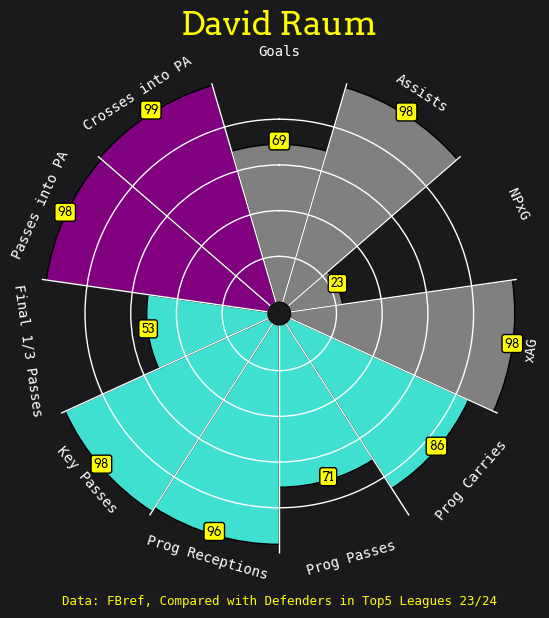

In [60]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(raum[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': 'yellow',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

# Add the title
ax.text(x=.5, y=1.1, s='David Raum', fontsize=24, c='yellow', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)

ax.text(
    x=.5, y=-0.1,  # Position below the plot (adjust y as needed)
    s='Data: FBref, Compared with Defenders in Top5 Leagues 23/24',  # Example subtext
    fontsize=9,  # Smaller font size for subtext
    color='yellow',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)

In [61]:
#fig.savefig('/Users/Trymso/Desktop/raum_radar.png', dpi=300, bbox_inches='tight')

Text(0.5, -0.1, 'Data: FBref, Compared with Forwards in Top5 Leagues 2024')

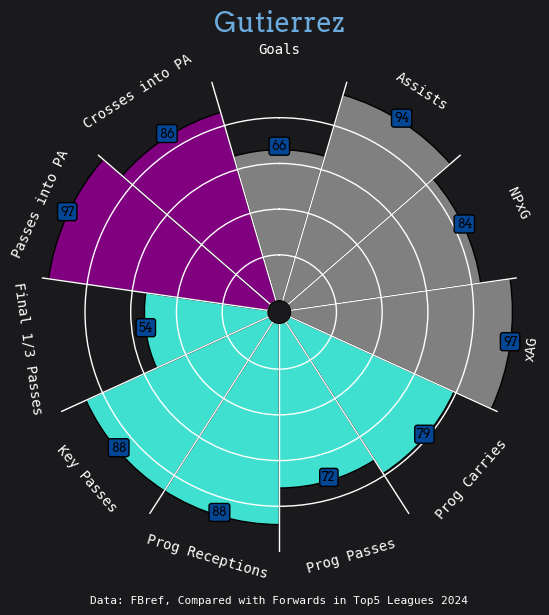

In [62]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(gutierrez[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': '#034694',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

# Add the title
ax.text(x=.5, y=1.1, s='Gutierrez', fontsize=20, c='#6CABDD', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)

ax.text(
    x=.5, y=-0.1,  # Position below the plot (adjust y as needed)
    s='Data: FBref, Compared with Forwards in Top5 Leagues 2024',  # Example subtext
    fontsize=8,  # Smaller font size for subtext
    color='#FFFFFF',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)

Text(0.5, -0.1, 'Data: FBref, Compared with Defenders in Top5 Leagues 23/24')

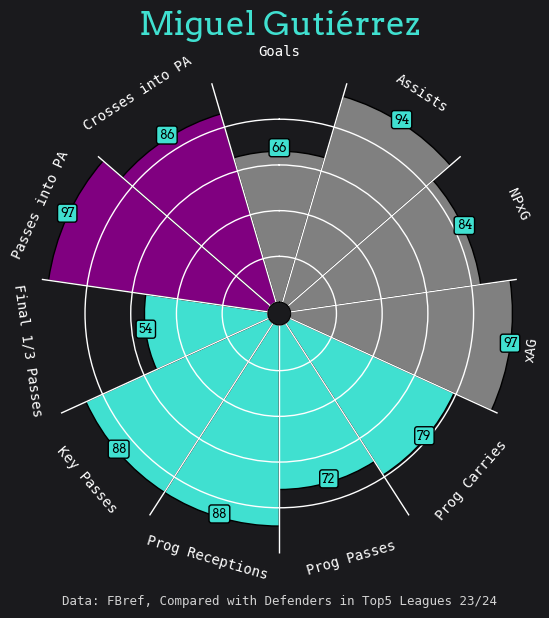

In [63]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(gutierrez[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': 'turquoise',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

# Add the title
ax.text(x=.5, y=1.1, s='Miguel Gutiérrez', fontsize=24, c='turquoise', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)

ax.text(
    x=.5, y=-0.1,  # Position below the plot (adjust y as needed)
    s='Data: FBref, Compared with Defenders in Top5 Leagues 23/24',  # Example subtext
    fontsize=9,  # Smaller font size for subtext
    color='lightgrey',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)

In [64]:
#fig.savefig('/Users/Trymso/Desktop/gutierrez_radar.png', dpi=300, bbox_inches='tight')

Text(0.5, -0.1, 'Data: FBref, Compared with Forwards in Top5 Leagues 2024')

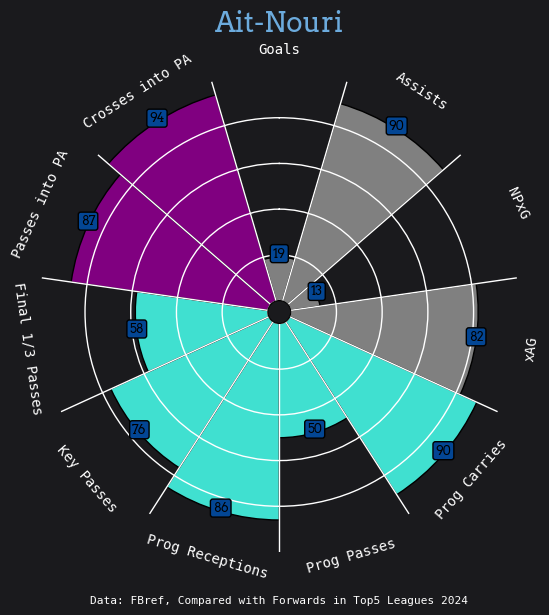

In [65]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(robinson[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': '#034694',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

# Add the title
ax.text(x=.5, y=1.1, s='Ait-Nouri', fontsize=20, c='#6CABDD', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)

ax.text(
    x=.5, y=-0.1,  # Position below the plot (adjust y as needed)
    s='Data: FBref, Compared with Forwards in Top5 Leagues 2024',  # Example subtext
    fontsize=8,  # Smaller font size for subtext
    color='#FFFFFF',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)

In [66]:
#Include logos in the middle of the chart

In [94]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

URL = Image.open("/Users/trymso/Documents/GitHub/complete-football-analytics/team_logos/bayern_logo.png")
putellas_cropped = Image.open(URL)

AttributeError: 'WebPImageFile' object has no attribute 'read'

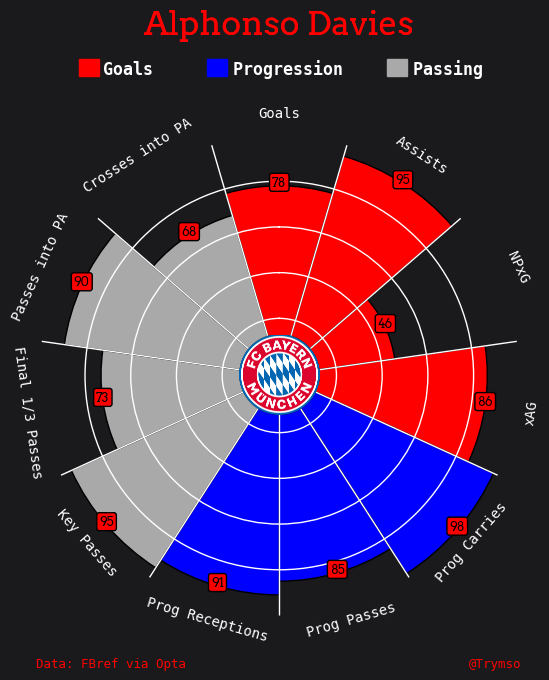

In [420]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white', 
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(davies[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': 'red',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

# Add the title
ax.text(x=.5, y=1.23, s='Alphonso Davies', fontsize=24, weight='bold', c='red', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)

ax.text(
    x=.15, y=-0.1,  # Position below the plot (adjust y as needed)
    s='Data: FBref via Opta',  # Example subtext
    fontsize=9,  # Smaller font size for subtext
    color='red',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)


# Add the title
ax.text(x=.5, y=1.23, s='Alphonso Davies', fontsize=24, weight='bold', c='red', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)

ax.text(
    x=.95, y=-0.1,  # Position below the plot (adjust y as needed)
    s='@Trymso',  # Example subtext
    fontsize=9,  # Smaller font size for subtext
    color='red',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties='monospace', 
    transform=ax.transAxes
)




import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import Radar, add_image


# add text
fig.text(
    0.28, 0.877, "Goals        Progression       Passing", size=12,
    fontproperties='monospace', weight='bold', color="white"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.25, 0.875), 0.025, 0.021, fill=True, color="red",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.41, 0.875), 0.025, 0.021, fill=True, color="blue",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.635, 0.875), 0.025, 0.021, fill=True, color="darkgrey",
        transform=fig.transFigure, figure=fig
    ),
])


# Load your team logo
chelsea_logo_path = "/Users/trymso/Desktop/Bayern_logo.png"
chelsea_logo = Image.open(chelsea_logo_path)

add_image(chelsea_logo, fig, left=0.45, bottom=0.45, width=0.1, height=0.1)



plt.show()

In [422]:
fig.savefig('/Users/Trymso/Desktop/davies_radar.png', dpi=300, bbox_inches='tight')

In [298]:
from matplotlib import rcParams
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

# Load the font
font_bold = FontProperties(fname='Roboto-Bold.ttf')